In [1]:
 %matplotlib inline
import sys
import numpy as np
import cv2
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt

sys.path.append("/opt/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/models/research")
sys.path.append("/opt/anaconda/envs/py36/lib/python3.6/site-packages/tensorflow/models/research/object_detection")


from tensorflow.models.research.object_detection.utils import label_map_util
from tensorflow.models.research.object_detection.utils import visualization_utils as vis_util

In [2]:
# image = cv2.imread('/home/maurice/ssd/binocular/datacrusader/temp_data/binocular/products/test/temp_img39.jpg')
image1 = cv2.imread('/home/maurice/ssd/binocular/datacrusader/temp_data/binocular/products/test/87529c32518649.568860f2ea66d.jpg')
# image2 = cv2.imread('/home/maurice/ssd/binocular/datacrusader/temp_data/binocular/products/test/624f6e32518649.568860f2e7c6c.jpg')
image2 = cv2.imread('/home/maurice/ssd/binocular/datacrusader/temp_data/binocular/products/test/2.jpeg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


In [3]:
prediction, main_result = get_prediction(image, category_index, detection_graph)

NameError: name 'get_prediction' is not defined

In [5]:
def show_img(img, size=(10,5)):
    plt.figure(figsize=size)
    plt.imshow(img)

In [4]:
show_img(image1)

NameError: name 'show_img' is not defined

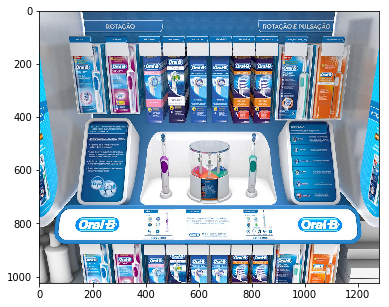

In [7]:
show_img(image2)

In [4]:
image1_cont = np.array([[514,321],[1228,335],[1204,757],[702,646]])
image2_cont = np.array([[113,98],[898,97],[869,421],[405,419]])


image1_tmp = cv2.drawContours(image1, np.array([image1_cont]), -1, (0,255,0), 3)
# image2_tmp = cv2.drawContours(image2, np.array([image2_cont]), -1, (0,255,0), 3)

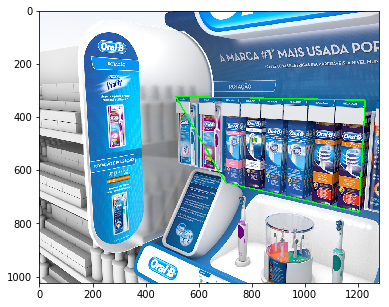

In [6]:
show_img(image1_tmp)

In [77]:
points_to_transform = np.array([[514,321]], dtype = "float32")
cv2.perspectiveTransform(points_to_transform,points_to_transform,M).shape

error: /tmp/build/80754af9/opencv_1512491966560/work/modules/core/src/matmul.cpp:2299: error: (-215) scn + 1 == m.cols in function perspectiveTransform


In [100]:

a = np.array([[1, 2], [4, 5], [7, 8]], dtype='float32')
h = np.array([[2, 4], [8, 10], [14, 16]], dtype='float32')
# a = np.array([a])

pointsOut = cv2.perspectiveTransform(a, h)
pointsOut.shape
pointsOut2 = cv2.getPerspectiveTransform(image1_cont, image2_cont)

In [101]:
pointsOut2

array([[ 2.95970951e+00,  2.80855967e-01, -1.41575449e+03],
       [ 7.06038528e-02,  2.12172649e+00, -5.47650298e+02],
       [ 1.17392922e-03,  3.99933964e-04,  1.00000000e+00]])

In [111]:
cv2.perspectiveTransform(np.array([image1_cont]), M)

array([[[113.,  98.],
        [898.,  97.],
        [869., 421.],
        [405., 419.]]], dtype=float32)

In [13]:
from myutils import productTrainGenerator
folder_path = "./temp_data/binocular"
file_names = [
#     "27cf4932518649.568860f2e8eee",
    
    # Pampers
    "14e1e050714687.56088f014e48a",
    "b7c85350714697.56088f8d0ed31",
    
    # Oral B
    "624f6e32518649.568860f2e7c6c",
    "87529c32518649.568860f2ea66d",

]


image_conts = [
    
    # Pampers
#     np.array([[280,170],[446,234],[435,324],[286,390]], dtype = "float32"),
#     np.array([[258,172],[420,129],[386,278],[249,339]], dtype = "float32"),
    
    np.array([[280,170],[446,234],[501,395],[286,390]], dtype = "float32"),
    np.array([[258,172],[420,129],[499,400],[249,339]], dtype = "float32"),
    
    # Oral B
    np.array([[317,412],[786,412],[778,612],[483,609]], dtype = "float32"),
    np.array([[514,321],[1228,335],[1204,757],[702,646]], dtype = "float32")
]





image_files = [ "{}/{}.jpg".format(folder_path,x) for x in file_names]
annotations_files = [ "{}/{}.xml".format(folder_path,x) for x in file_names]


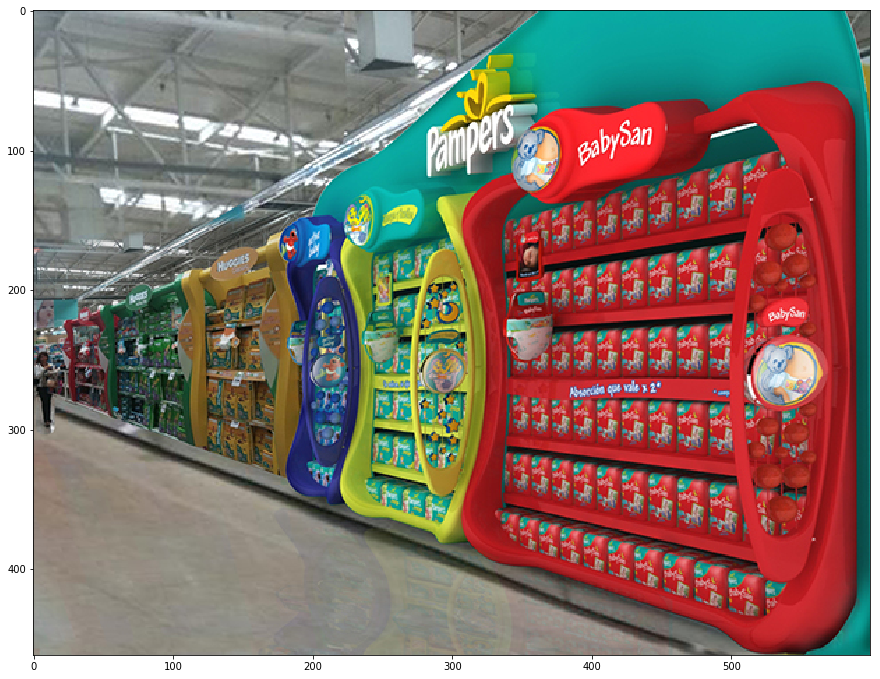

In [17]:
show_img(images[1],(15,15))

In [14]:
images, annots, names = productTrainGenerator.extract_images_annotations(image_files, annotations_files)

In [163]:
def get_boxes(annots):
    return [np.array([[x,y],[x+w,y],[x+w,y+h],[x,y+h]], dtype = "float32") for (x,y),w,h in annots]        

In [164]:
boxes = [get_boxes(annots_set) for annots_set in annots]

In [184]:
def draw_contours_set(image, boxes, color=(0,255,0)):
    image = np.copy(image)
    boxes = np.array(boxes,dtype=int)
    image_tmp = cv2.drawContours(image, np.array(boxes), -1, color, 2)
    return image_tmp

In [152]:
# image1_boxes = draw_contours_set(images[0],boxes[0])
# image2_boxes = draw_contours_set(images[1],boxes[1])

images_boxes = [ draw_contours_set(img,box) for img, box in zip(images,boxes)]

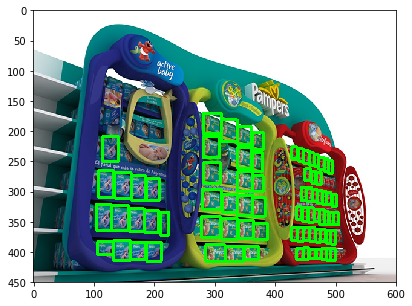

In [153]:
show_img(images_boxes[0])

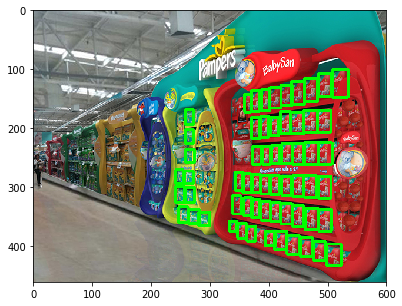

In [154]:
show_img(images_boxes[1])

In [165]:

# pampers
M01 = cv2.getPerspectiveTransform(image_conts[0], image_conts[1])
warped01 = cv2.warpPerspective(images[0], M01, (images[1].shape[1],images[1].shape[0]))
boxes01 = cv2.perspectiveTransform(np.array(boxes[0]), M01)

M10 = cv2.getPerspectiveTransform(image_conts[1], image_conts[0])
warped10 = cv2.warpPerspective(images[1], M10, (images[0].shape[1],images[0].shape[0]))
boxes10 = cv2.perspectiveTransform(np.array(boxes[1]), M10)

# OralB
M2 = cv2.getPerspectiveTransform(image_conts[2], image_conts[3])
warped2 = cv2.warpPerspective(images[2], M2, (images[3].shape[1],images[3].shape[0]))
boxes2 = cv2.perspectiveTransform(np.array(boxes[2]), M)

In [210]:
def get_centroid(box):
    return [(box[0][0]+box[1][0]+box[2][0]+box[3][0])/4, (box[0][1]+box[1][1]+box[2][1]+box[3][1])/4]

def dist_points(p1,p2):
#     print(p1)
    d = np.array(p1)-np.array(p2)
    return np.sqrt(np.square(d[0])+np.square(d[1]))

def is_boxes_same(box1,box2):
    centroid1 = get_centroid(box1)
    centroid2 = get_centroid(box2)
    
    dist = dist_points(centroid1,centroid2)

    return dist<20
    
def regularize_boxes(boxes):
    

def precess_boxes(actual,transposed):
    
    nomatch_actual = []
    match_actual = []
    for ac in actual:
        found = False
        for tr in transposed:
            is_same = is_boxes_same(ac,tr)
            if is_same:
                match_actual.append(ac)
                found = True
                break
        if not found: nomatch_actual.append(ac)
                
                
    nomatch_trans = []
    match_trans = []
    for tr in transposed:
        found = False
        for ac in actual:
            is_same = is_boxes_same(ac,tr)
            if is_same:
                match_trans.append(tr)
                found = True
                break
        if not found: nomatch_trans.append(tr)
                
    return nomatch_actual, match_actual,  nomatch_trans, match_trans

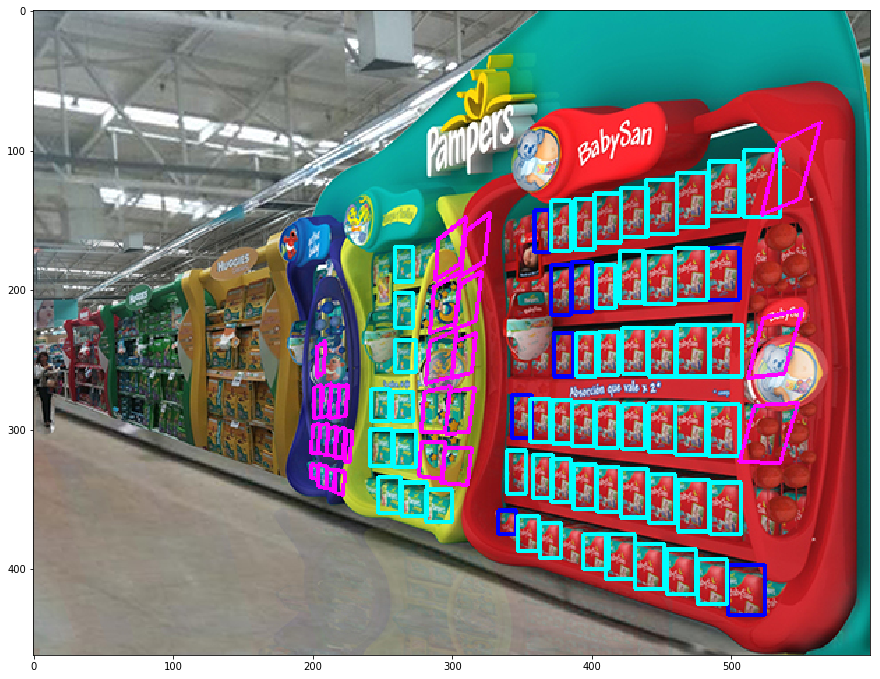

In [212]:
nomatch_actual, match_actual, nomatch_trans, match_trans = precess_boxes(boxes[1],boxes01)

image1_extend = np.copy(images[1])
image1_extend = draw_contours_set(image1_extend,nomatch_actual,(0,0,255))
image1_extend = draw_contours_set(image1_extend,match_actual,(0,255,255))
image1_extend = draw_contours_set(image1_extend,nomatch_trans,(255,0,255))

show_img(image1_extend,(15,15))

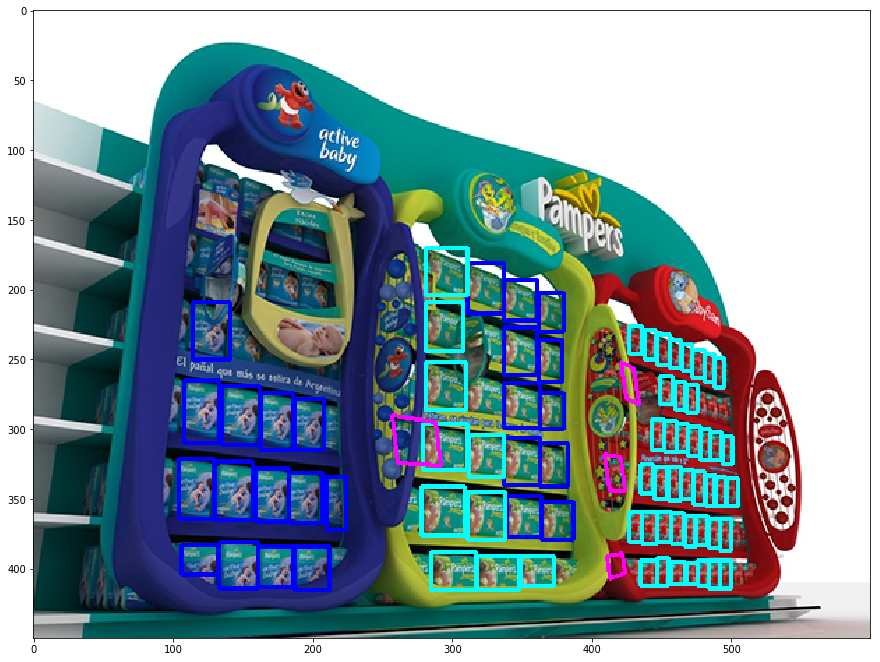

In [213]:
nomatch_actual, match_actual, nomatch_trans, match_trans = precess_boxes(boxes[0],boxes10)

image1_extend = np.copy(images[0])
image1_extend = draw_contours_set(image1_extend,nomatch_actual,(0,0,255))
image1_extend = draw_contours_set(image1_extend,match_actual,(0,255,255))
image1_extend = draw_contours_set(image1_extend,nomatch_trans,(255,0,255))

show_img(image1_extend,(15,15))

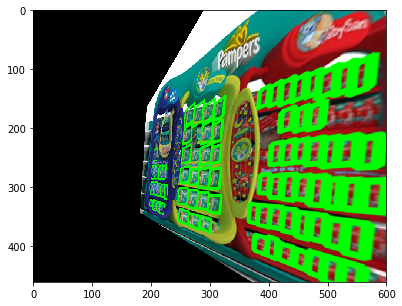

In [129]:
show_img(warped01)

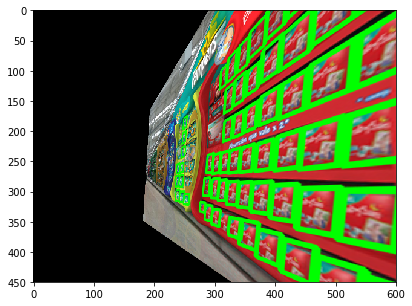

In [130]:
show_img(warped10)